In [1]:
#ASSIGNMENT

#Task1:Use DataFrame constructor in Pandas to create your own Dataframe

import pandas as pd

mydataset={
    'names':['Virat','Dhoni','Yuvraj','Raina','sky','jadeja','Rohit'],
    'scores': [60,55,52,51,49,46,44],
    'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes']
}
myvar=pd.DataFrame(mydataset)
print(myvar)

    names  scores qualify
0   Virat      60     yes
1   Dhoni      55      no
2  Yuvraj      52     yes
3   Raina      51      no
4     sky      49      no
5  jadeja      46     yes
6   Rohit      44     yes


In [2]:
#Task2:Print a choosen row or a choosen column(data field)
print("Selected Specific columns:")
print(myvar[['names','scores']])

Selected Specific columns:
    names  scores
0   Virat      60
1   Dhoni      55
2  Yuvraj      52
3   Raina      51
4     sky      49
5  jadeja      46
6   Rohit      44


In [3]:
#Task3:Print rows that satisfy a condition on one of the column entries.For Example,if you create a DataFrame of players
#performance in a cricket match and record the runs scored by the player in a cricket match.Then you should be able to
#the print records of players who scored more then 50 runs.Also sort the records based on the number of runs
#scored by each player

print("The players who scored more then 50 runs :")
print(myvar[(myvar['scores'] >= 50)])
#myvar_sort = myvar.sort_values('Scores')
#print(myvar_sort)

The players who scored more then 50 runs :
    names  scores qualify
0   Virat      60     yes
1   Dhoni      55      no
2  Yuvraj      52     yes
3   Raina      51      no


In [4]:
#Task4:Use vectorised operations.For Example you may be required to compute the percentage runs scored by each player
#where the percentage is with respect to the total runs scored by the team in an innings
# Compute the percentage of runs scored by each player

tot_runs = myvar['scores'].sum()
myvar['Percentage'] = (myvar['scores'] / tot_runs) * 100

# Display the updated DataFrame
print(myvar)

    names  scores qualify  Percentage
0   Virat      60     yes   16.806723
1   Dhoni      55      no   15.406162
2  Yuvraj      52     yes   14.565826
3   Raina      51      no   14.285714
4     sky      49      no   13.725490
5  jadeja      46     yes   12.885154
6   Rohit      44     yes   12.324930


In [5]:
#Task5:Add a new column to the DataFrame.For example you may want to add the number written on the player's jersey
myvar.insert(2, "Jersey_no", [21, 23, 24, 25,26,37,45],True)
print(myvar)

    names  scores  Jersey_no qualify  Percentage
0   Virat      60         21     yes   16.806723
1   Dhoni      55         23      no   15.406162
2  Yuvraj      52         24     yes   14.565826
3   Raina      51         25      no   14.285714
4     sky      49         26      no   13.725490
5  jadeja      46         37     yes   12.885154
6   Rohit      44         45     yes   12.324930


In [6]:
#Task6:Export the DataFrame to a file in pickle format and save it as a file.Read the pickle file back to the program
import pickle #importing the pickle
myvar.to_pickle('mydataset.pickle') #Exported DataFrame to pickle file

In [7]:
myvar = pd.read_pickle('mydataset.pickle') #Reading the pickle file
print(myvar) #Displayed the DataFrame

    names  scores  Jersey_no qualify  Percentage
0   Virat      60         21     yes   16.806723
1   Dhoni      55         23      no   15.406162
2  Yuvraj      52         24     yes   14.565826
3   Raina      51         25      no   14.285714
4     sky      49         26      no   13.725490
5  jadeja      46         37     yes   12.885154
6   Rohit      44         45     yes   12.324930


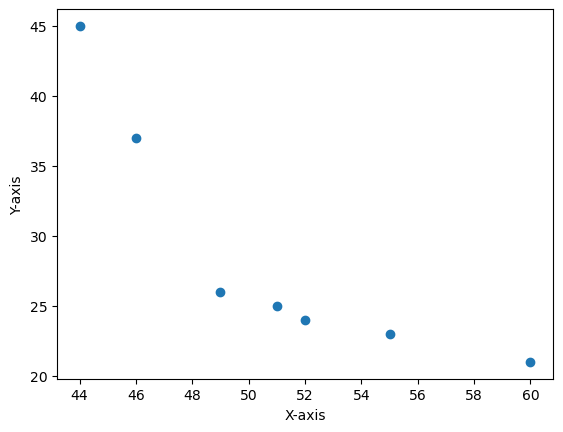

In [8]:
#Task7:Use matplotlib library to make a scatter plot of columns that contain numeric data provide labels to the axes
import matplotlib.pyplot as plt

# Createing a scatter plot
plt.scatter(myvar['scores'], myvar['Jersey_no'])

# Add labels to the axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

#To Display
plt.show()

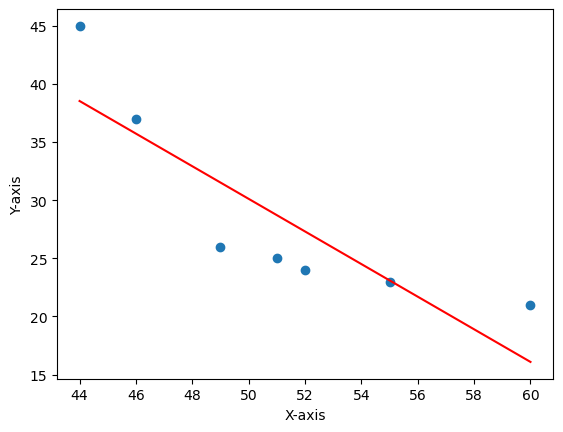

In [10]:
#Task8:Implement Linear Regression to model the dependency between two variables -the predictor x and target y.you can choose
#choose any two columns in your data frame as the two variables.print the coeffients obtained from linear Regression
#plot the straight line on the scatter plot.Do not use any inbuilt function for implementing linear Regression You
#need to formulate a linear system of Equations and solve them using pseudo inverse.You can compare your result with 
#that produced by the fit() function of Linear Regression model in sklearn

import numpy as np

# Extract the predictor (X) and target (Y) variables
X = myvar['scores'].values
Y = myvar['Jersey_no'].values

# Createing a design matrix with a column of ones for the intercept term
X_design = np.column_stack((np.ones(len(X)), X))

# Solved the linear system using the pseudo-inverse method
coefficients = np.linalg.pinv(X_design) @ Y

# Extracting the intercept and slope coefficients
intercept = coefficients[0]
slope = coefficients[1]

# Createing a scatter plot
plt.scatter(X, Y)

# Plot the straight line using the regression coefficients
plt.plot(X, intercept + slope*X, color='red')

# Adding labels to the axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

#To Display
plt.show()